C:\Users\angel\AppData\Local\Temp\ipykernel_39612\662578997.py:28: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, num_simulations)
c:\Users\angel\Proyectos\VIII\MODSIM\Corto2_ModSim\cortoMS\Lib\site-packages\SALib\sample\saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)


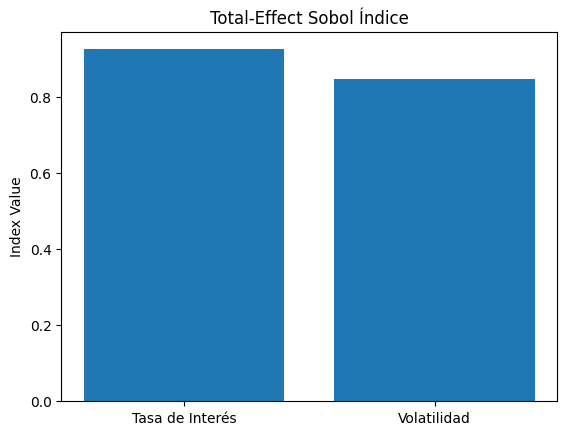

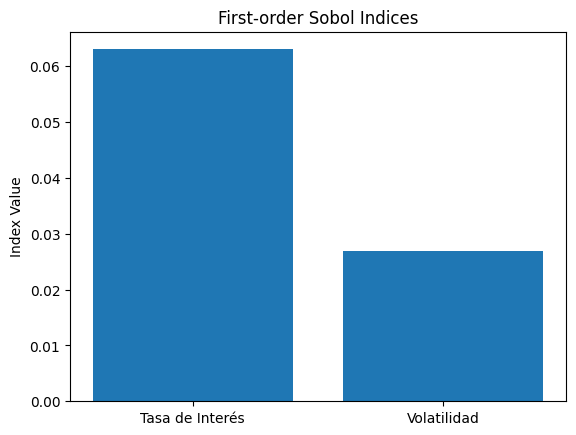

{'S1': array([0.06303446, 0.02684489]), 'S1_conf': array([0.10800021, 0.07758885]), 'ST': array([0.92419121, 0.84622568]), 'ST_conf': array([0.08196916, 0.08155352]), 'S2': array([[       nan, 0.03095628],
       [       nan,        nan]]), 'S2_conf': array([[       nan, 0.11979874],
       [       nan,        nan]])}


In [17]:
import numpy as np
from SALib.sample import saltelli
from SALib.analyze import sobol
import matplotlib.pyplot as plt

# Parámetros
num_simulations = 1000
horizonte_inversion = 5
tasa_descuento = 0.1

problem = {
    'num_vars': 2,
    'names': ['Tasa de Interés', 'Volatilidad'],
    'bounds': [[0.08, 0.12], [0.15, 0.25]]
}
np.random.seed(2001)
# Función de simulación
def simulate(params):
    tasa_interes, volatilidad = params
    VAN = 0
    for t in range(horizonte_inversion):
        flujo_caja = np.random.normal(loc=500000, scale=100000)
        flujo_caja_descuento = flujo_caja / ((1 + tasa_descuento + tasa_interes) ** (t + 1))
        VAN += flujo_caja_descuento
    return VAN

# Simulación de Monte Carlo con Análisis de Sensibilidad Sobol
param_values = saltelli.sample(problem, num_simulations)
Y = [simulate(params) for params in param_values]
Si = sobol.analyze(problem, np.array(Y))

# Visualización
plt.bar(problem['names'], Si['ST'], tick_label=problem['names'])
plt.title('Total-Effect Sobol Índice')
plt.ylabel('Index Value')
plt.show()
plt.bar(problem['names'], Si['S1'])
plt.title('First-order Sobol Indices')
plt.ylabel('Index Value')
plt.show()

print(Si)


### 1. ¿Qué tanto influye cada variable en el VPN?

Tasa de Interés: Su índice de sensibilidad de primer orden S1 es aproximadamente 0.063, y su índice total ST es 0.924.
Volatilidad: Su índice de sensibilidad de primer orden S1 es aproximadamente 0.027, y su índice total ST es 0.846.
Los índices S1 miden la contribución de cada entrada a la varianza total del output, mientras que ST mide la contribución total, incluyendo las interacciones entre variables.

### 2. ¿Qué variable influye más? ¿Por qué cree que es esto?

La Tasa de Interés influye ligeramente más en el VPN que la Volatilidad si nos basamos en el índice de primer orden S1. La tasa de interés podría tener un impacto mayor en la inversión ya que afecta directamente el cálculo de los flujos de caja descontados, mientras que la volatilidad podría tener un efecto más indirecto en la inversión.

### 3. ¿Hay una diferencia significativa en la influencia de cada variable? ¿Por qué?

La diferencia en la influencia de las variables no es muy significativa, ya que los valores de S1 y ST para ambas variables son relativamente cercanos. La interacción entre estas variables (índice S2) también contribuye, lo que sugiere que no hay un claro dominio de una variable sobre la otra en términos de influencia en el VPN.

### 4. Si tuviera que hacer mejoras al análisis, ¿qué podría hacer?

-   Podría aumentar el número de simulaciones para obtener una estimación más precisa de los índices de sensibilidad.
-   Considerar la inclusión de otras variables que puedan afectar el VPN y realizar un análisis más detallado de las interacciones entre ellas.
-   Utilizar una distribución que refleje mejor los flujos de caja en lugar de una normal, tal vez basándose en datos históricos o conocimientos del dominio.
-   Realizar un análisis de sensibilidad local para entender cómo cambia la influencia de cada variable en diferentes partes del espacio de entrada.